## Landsat 8 Bands
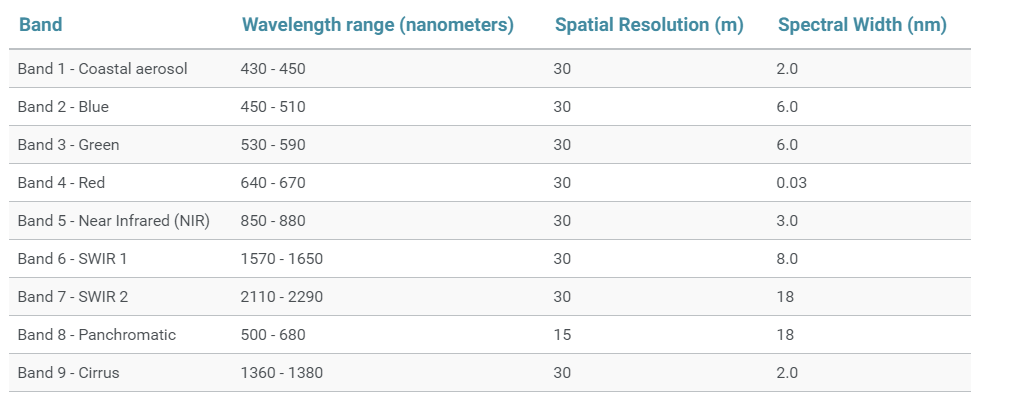

## Data Range
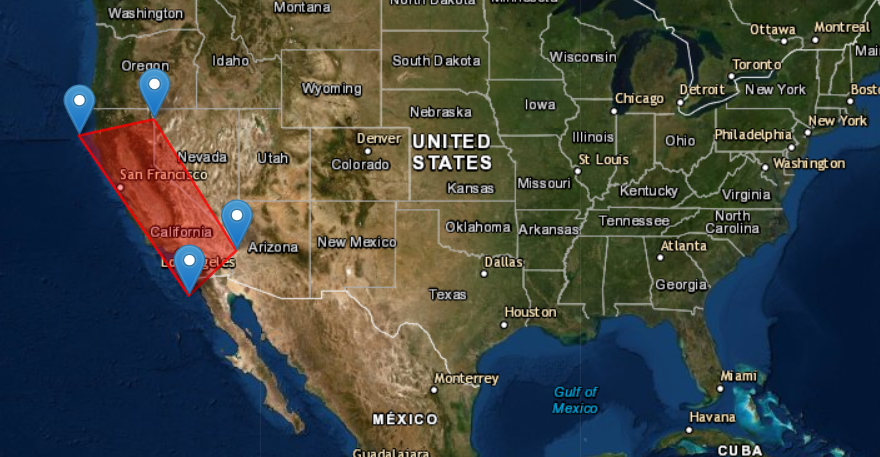

## Data Amount
We have 277 pictures (One year, California)if we choose:

1. Land Cloud Cover = less than 10%

2. Scene Cloud Cover = less than 10%

3. Collection Category = Tier 1

4. Data Type Level = Level1 TP  (same as the tutorial)

We have 618 pictures if we remove the 1st and 2nd criteria.

### Collection Category
**Field Definition:**  

Landsat Collection 1 is organized by a tiered inventory structure to indicate the quality and level of processing of the data. 

**Values:**

T1 = Tier 1 is the highest available quality and processing level. This category is suitable for time-series analysis across the different Landsat sensors. 

T2 = Tier 2 scenes contain significant cloud cover and have insufficient ground control to generate precision and terrain corrected products. 

RT = Real-Time indicates initial processing with additional processing required to achieve Tier 1 or Tier 2.

### Data Type Level
L1TP: Precision Terrain

L1GT: Systematic Terrain

L1GS: Systematic

## Visualize Data Example
### Plot Band 4

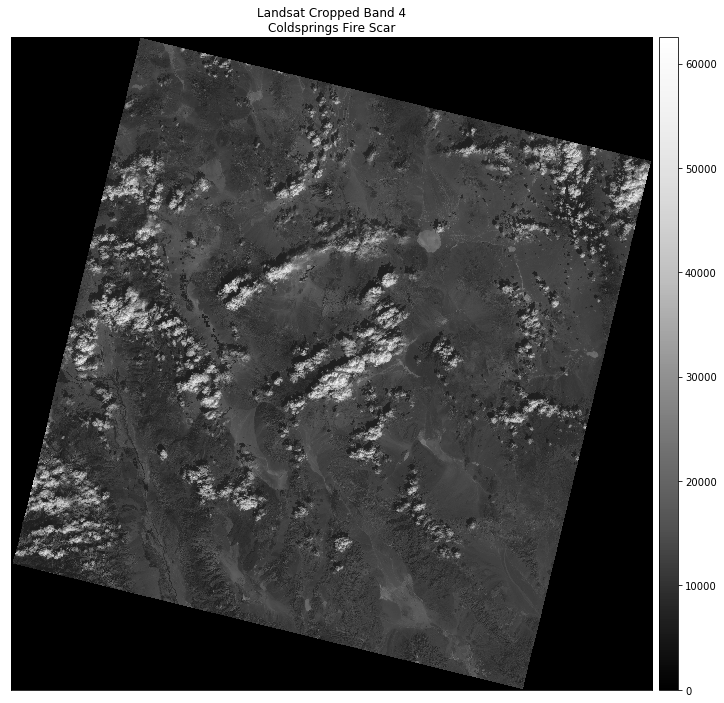

In [2]:
import os
import numpy as np
# File manipulation
from glob import glob
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio as rio
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

os.chdir('F:\earth-analytics')


all_landsat_post_bands = glob("data\LC08_L1TP_041034_20190919_20190926_01_T1\*B*.tif")

all_landsat_post_bands.sort()

# Open a single band and plot
with rio.open(all_landsat_post_bands[3]) as src:
    landsat_band4 = src.read()

ep.plot_bands(landsat_band4[0],
              title="Landsat Cropped Band 4\nColdsprings Fire Scar",
              scale=False)
plt.show()

Landsat band 4 - red band - plot

### Create Raster Stack of All Landsat Bands in Python

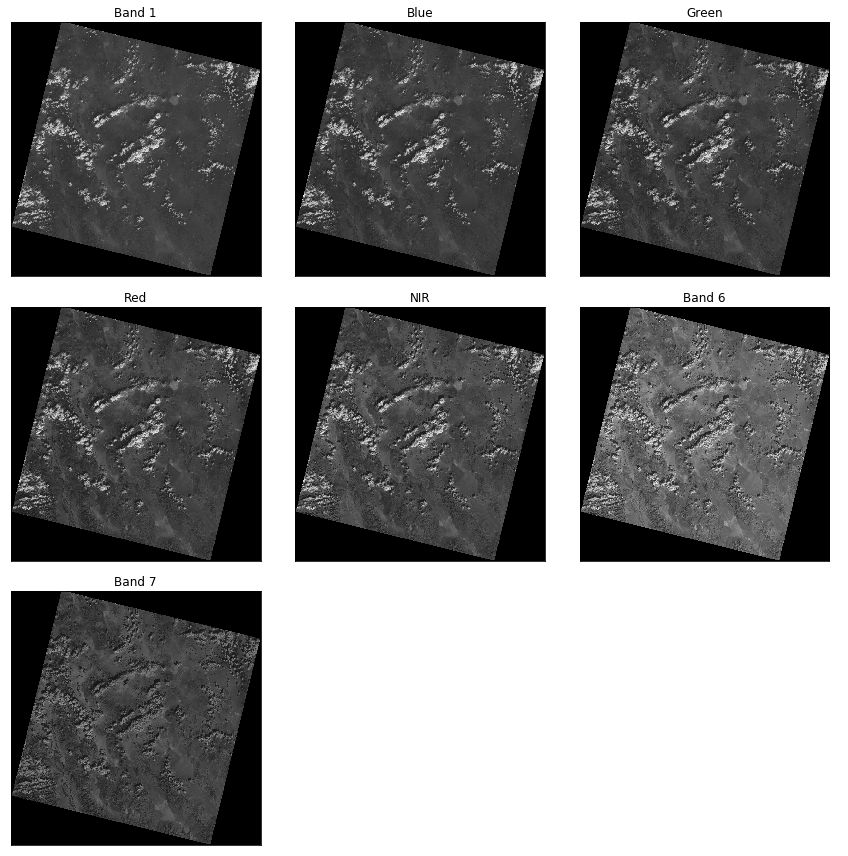

In [3]:
landsat_post_fire_path = "data\outputs\landsat_post_fire.tif"
# This will create a new stacked raster with all bands
land_stack, land_meta = es.stack(all_landsat_post_bands,landsat_post_fire_path)

with rio.open(landsat_post_fire_path) as src:
    landsat_post_fire = src.read()
# Plot all bands using earthpy
band_titles = ["Band 1", "Blue", "Green", "Red", "NIR",
               "Band 6", "Band 7"]
ep.plot_bands(landsat_post_fire,
              title=band_titles, cbar=False)
plt.show()

### Plot RGB Image (How to combine different bands)

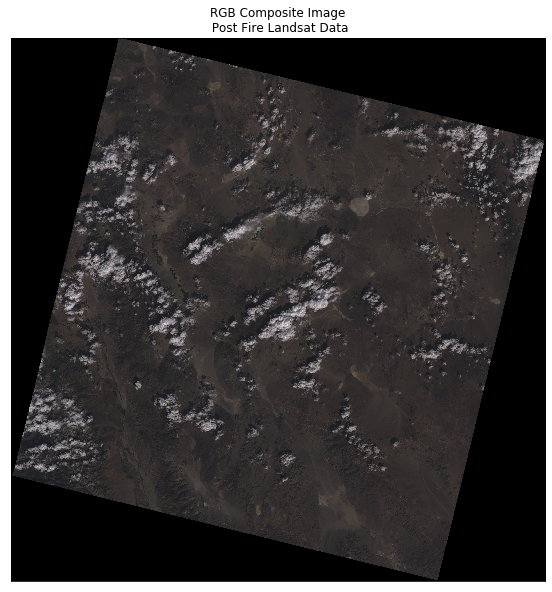

hello


In [7]:
ep.plot_rgb(landsat_post_fire,
            rgb=[3, 2, 1],
            title="RGB Composite Image\n Post Fire Landsat Data")
plt.show()

### Linear Stretch

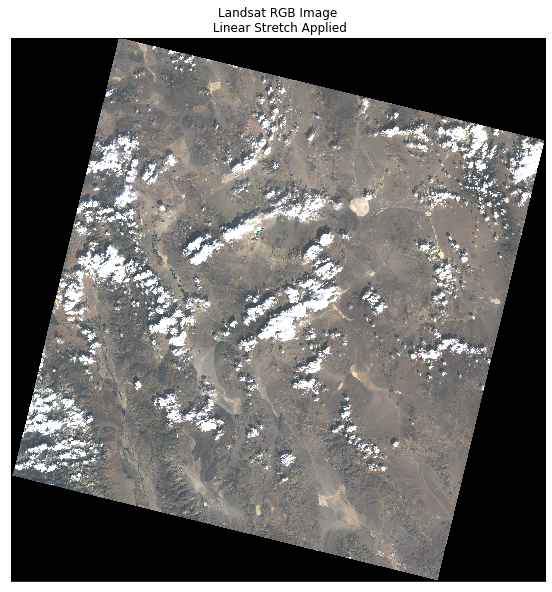

In [8]:
# Adjust the amount of linear stretch to futher brighten the image
ep.plot_rgb(landsat_post_fire,
            rgb=[3, 2, 1],
            title="Landsat RGB Image\n Linear Stretch Applied",
            stretch=True,
            str_clip=4)
plt.show()

### Raster Pixel Histograms

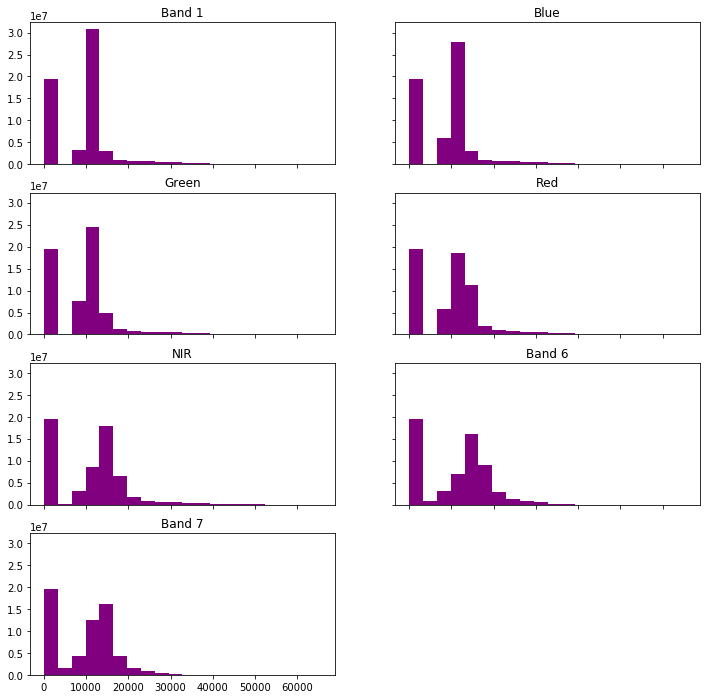

In [9]:
ep.hist(landsat_post_fire,
        title=band_titles)
plt.show()

### Calculate NDVI

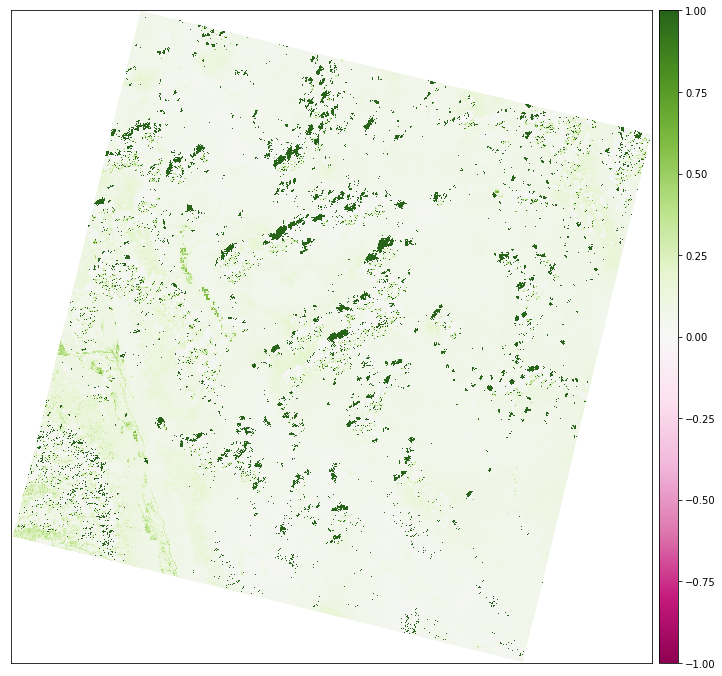

In [17]:
nir_band = landsat_post_fire[4]
red_band = landsat_post_fire[3]
ndvi = es.normalized_diff(nir_band, red_band)
ep.plot_bands(ndvi, cmap='PiYG',
              scale=False,
              vmin=-1, vmax=1)
plt.show()

### View Distribution of NDVI Values

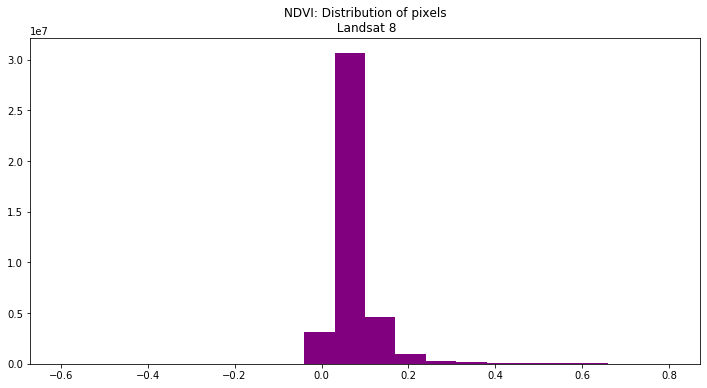

In [20]:
ep.hist(ndvi,
        hist_range=(-0.6,0.8),
        figsize=(12, 6),
        title=["NDVI: Distribution of pixels\n Landsat 8"])
plt.show()